# Logistic Algorithim on Diabetes 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


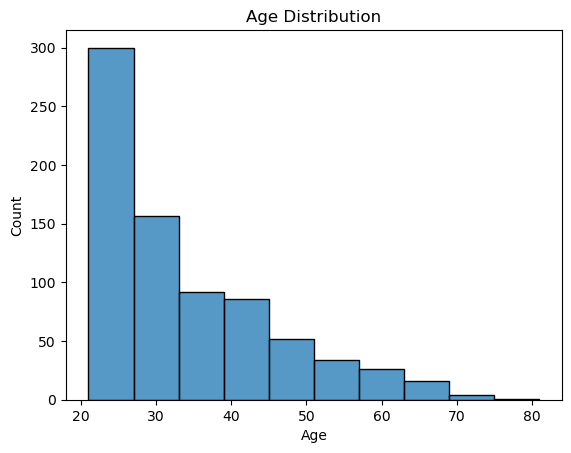

In [17]:
sns.histplot(x=data["Age"],bins=10 )
plt.title("Age Distribution")
plt.show()

In [67]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [69]:
negative = data[data.Outcome==0].sample(300)
positive = data[data.Outcome==1]

In [70]:
balanced_data = pd.concat([negative,positive]).sample(568)

In [75]:
X = balanced_data.drop(['Outcome'],axis=1)

In [76]:
y = balanced_data.Outcome

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

# Scaling the data: Standard Scalar

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [79]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [80]:
from sklearn.linear_model import LogisticRegression


In [81]:
log_r = LogisticRegression()

In [82]:
log_r.fit(X_train,y_train)

LogisticRegression()

In [83]:
y_pred =log_r.predict(X_train)

In [84]:
pd.DataFrame({'Original':y_train,'Predicted':y_pred})

,Original,Predicted
53,1,1
579,1,1
659,1,0
233,0,0
586,1,1
...,...,...
502,1,0
619,1,0
766,1,0
43,1,1


In [85]:
count = 0
for t,p in zip(y_train,y_pred):
    if t==p:
        count +=1
acc = count/len(y_train)
print(f"Model has {acc} % accuracy in traning")

Model has 0.7723004694835681 % accuracy in traning


In [86]:
y_pt = log_r.predict(X_test)

In [87]:
count = 0
for t,p in zip(y_test,y_pt):
    if t==p:
        count +=1
acc = count/len(y_test)
print(f"Model has {acc} % accuracy in traning")

Model has 0.7605633802816901 % accuracy in traning


# Evaluation Metrices

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.7723004694835681

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pt)

0.7605633802816901

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       227
           1       0.77      0.73      0.75       199

    accuracy                           0.77       426
   macro avg       0.77      0.77      0.77       426
weighted avg       0.77      0.77      0.77       426



In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pt))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        73
           1       0.83      0.64      0.72        69

    accuracy                           0.76       142
   macro avg       0.77      0.76      0.76       142
weighted avg       0.77      0.76      0.76       142



In [97]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,y_pred))

[[184  43]
 [ 54 145]]


In [98]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pt))

[[64  9]
 [25 44]]


In [105]:
# Example new data (e.g. Age, BMI, Blood Pressure, etc.)
new_data = [[45, 30, 80, 120, 80, 0, 1,20]] 

# Scale the new data (same scaler as training data)
new_data_scaled = scaler.transform(new_data)

# Predict if this person has diabetes (1) or not (0)
prediction = log_r.predict(new_data_scaled)

if prediction == 1:
    print("The person has diabetes.")
else:
    print("The person does not have diabetes.")

The person does not have diabetes.


C:\Users\Wajiz.pk\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
